<a href="https://www.kaggle.com/nhiyen/udacity-seattle-airbnb-analysis?scriptVersionId=83807817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [UDACITY] Seattle Airbnb Analysis
The Settle Airbnb Open Dateset is chosen for **UDACITY Project - Write a Data Science Blog Post**.

6 steps of CRISP-DM (Cross-Industry Standard Process for Data Mining):
1. Business Understanding
1. Data Understanding
1. Data Preparation
1. Modelling
1. Evaluation
1. Deployment



# 1. Business Understanding
Airbnb has been allowing visitors and hosts to expand their travel options and provide a more distinctive, personalised way of experiencing the world since 2008. Airbnb has evolved into a one-of-a-kind service that is used and recognised all over the world. The company's data analysis of millions of listings offered by Airbnb is a critical aspect. These millions of listings generate a lot of data, which can be analysed and used for a variety of purposes, including security, business decisions, understanding customer and provider (host) behaviour and performance on the platform, guiding marketing initiatives, and implementing innovative additional services, among others.

In this project, we are going to use **calendar.csv** and **listings.csv** to answer 3 business questions:
1. Which is the most busiest time in Settle?
1. Where is the most crowdest in Settle?
1. Price Prediction.



# 2. Data Understanding
The **Seatlle Airbnb Open** Dataset catalogues homestay listings in Seattle, Washington from 01-2016 to 01-2017.


There are 3 subsets in the dataset:
1. The pricing for each listing id for a certain day is described in **calendar.csv**.
1. **listings.csv** contains a detailed description of each listing id, as well as review scores.
1. For each individual listing id, **reviews.csv** gives detailed reviews.

First, let's import the data & revelant libraries needed for the analysis.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
pd.options.mode.chained_assignment = None

In [2]:
calendar = pd.read_csv('../input/seattle/calendar.csv')
listings = pd.read_csv('../input/seattle/listings.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
print('The listings.csv subset has {} columns and {} rows.'.format(listings.shape[1], listings.shape[0]))

The listings.csv subset has 92 columns and 3818 rows.


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# 3. Prepare Data

Having a glance at the **calendar.csv**. 
There are 4 columns. 

The **listing_id** and **price** columns are currently NOT in the correct datatype. We need to convert the data type of **listing_id** column into string and **price**'s into float.

We are going to extract **month** and **month_year** from the **date** column also.

In [8]:
# listing_id
calendar['listing_id'] = calendar['listing_id'].astype(str)

# month & month_year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')

# price
calendar['price'] = calendar['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)

calendar.head()

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,1,2016,2016-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01
2,241032,2016-01-06,f,NaN,1,2016,2016-01
3,241032,2016-01-07,f,NaN,1,2016,2016-01
4,241032,2016-01-08,f,NaN,1,2016,2016-01


listings - Detailed listings data for each listing, including 92 attributes. For price prediction, only relevant features are chosen:
**'price','accommodates','bathrooms','bedrooms','beds','weekly_price','monthly_price','cleaning_fee', 'instant_bookable','reviews_per_month','cancellation_policy'** 

Name the new dataframe as q3 (the dataframe for quesiton 3)

In [9]:
relevant_features = ['price','accommodates','bathrooms','bedrooms','beds','weekly_price','monthly_price','cleaning_fee', 'instant_bookable','reviews_per_month','cancellation_policy']
q3 = listings[relevant_features]
q3.head()

,price,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,instant_bookable,reviews_per_month,cancellation_policy
0,$85.00,4,1.0,1.0,1.0,NaN,NaN,NaN,f,4.07,moderate
1,$150.00,4,1.0,1.0,1.0,"$1,000.00","$3,000.00",$40.00,f,1.48,strict
2,$975.00,11,4.5,5.0,7.0,NaN,NaN,$300.00,f,1.15,strict
3,$100.00,3,1.0,0.0,2.0,$650.00,"$2,300.00",NaN,f,NaN,flexible
4,$450.00,6,2.0,3.0,3.0,NaN,NaN,$125.00,f,0.89,strict


There are some issues we need to handle in the q3 dataframe:
* String into Float for price-related columns
* Missing values in numberic variables
* Missing values in categorical variables

### String into Float for price-related columns

In [10]:
q3['price'] = q3['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
q3['weekly_price'] = q3['weekly_price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
q3['monthly_price'] = q3['monthly_price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
q3['cleaning_fee'] = q3['cleaning_fee'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)

#### Missing values in numberic variables

Imputing objects into the matrix rather than dropping them is one method to start making predictions on these values.

Drop the rows with missing response (price) values, then use the column's mean to estimate the values for all the other missing values.

In [11]:
num_vars = q3.select_dtypes(include=['int','float']).columns
for var in num_vars:
    q3.loc[:,var] = q3[var].fillna(q3[var].mean())
# q3[num_vars].info()

#### Missing values in categorical variables

NaN values are frequently informative, but by leaving them as 0 in every column of your model, you are not capturing them. As a result, utilise **get dummies** to encode **NaN** values as their own dummy coded column using the **dummy na** option for categorical variables.

In [12]:
cat_bool_vars = q3.select_dtypes(include=['object','bool']).columns
cat_bool_vars
for var in cat_bool_vars:
    q3 = pd.concat([q3.drop(var, axis=1), pd.get_dummies(q3[var], prefix=var, prefix_sep='_', drop_first=True)],
                         axis=1)

Now the data is clean and ready for the next steps.

# 4. Modeling & Evaluation

## Question 1. Airbnb Busiest Times in Settle

An Airbnb host can configure their listing's calendar to only be open for a few days or weeks every year.
Other listings are available throughout the year (except for when it is already booked).

The price is available only when available = t.

In [13]:
check_f = calendar[(calendar['available'] == 'f') & (calendar['price'].notnull())].shape[0]
print('The number of rows where available = f and price is present is: {}  row(s)'.format(check_f))

The number of rows where available = f and price is present is: 0  row(s)


Only choose available = t where the price is available for all listing_id.
The calendar.csv subset is now ready. Let's pivot and plot some charts accordingly.

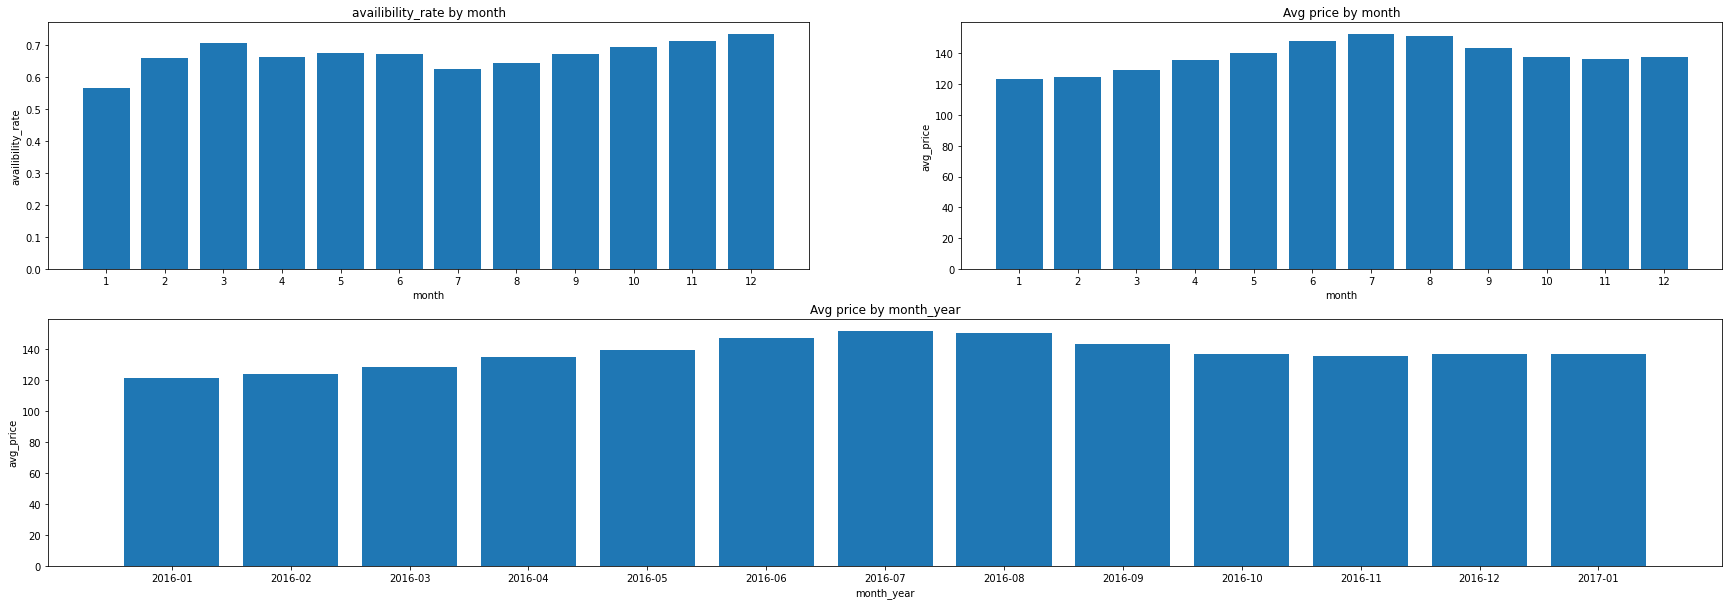

In [14]:
pivot_1 = pd.pivot_table(calendar[calendar['available'] == 't'], index='month', values=['price'], aggfunc={ 'price':np.mean})
pivot_1['month'] = pivot_1.index

pivot_2 = pd.pivot_table(calendar[calendar['available'] == 't'], index='month_year', values=['price'], aggfunc={'price':np.mean})
pivot_2['month_year'] = pivot_2.index
pivot_2['month_year'] = [str(x) for x in pivot_2['month_year']]

pivot_3 = pd.pivot_table(calendar, index='month', values=['listing_id'], columns=['available'], aggfunc={'listing_id': 'count'})
pivot_3['month'] = pivot_3.index
pivot_3['available_t'] = pivot_3.iloc[:,1]
pivot_3['available_f'] = pivot_3.iloc[:,0]

pivot_3['availibility_rate'] = pivot_3['available_t']/(pivot_3['available_t']+pivot_3['available_f'])
pivot_3 = pivot_3[['month','availibility_rate']].reset_index(drop=True)
pivot_3

plt.figure(figsize=(30, 10))
g = plt.GridSpec(2, 2) #Grid


plt.subplot(g[0,0])
plt.bar(pivot_3['month'], pivot_3['availibility_rate'])
plt.xlabel('month')
plt.xticks(pivot_3['month'])
plt.ylabel('availibility_rate')
plt.title('availibility_rate by month')


plt.subplot(g[0,1])
plt.bar(pivot_1['month'], pivot_1['price'])
plt.xlabel('month')
plt.xticks(pivot_1['month'])
plt.ylabel('avg_price')
plt.title('Avg price by month')

plt.subplot(g[1,:])
plt.bar(pivot_2['month_year'], pivot_2['price'])
plt.xlabel('month_year')
plt.xticks(pivot_2['month_year'])
plt.ylabel('avg_price')
plt.title('Avg price by month_year')

plt.show()

It seems that life in Seattle is pretty much busy the whole year. The availability rate is always more than 0.5 and above. The busiest time of the year falls into March, November and December (availability rate is more than 0.7). It is easy to understand because in March, public holidays falls into weekend and there are 2 holidays/ month, people tends to spend more on travelling. The hosts also have a plan to set their availability on Airbnb. It is the same reason for Christmas - the biggest event of the year.

Hosts on Airbnb also have a strategy for their business. They tends to give a discount when the number of guests reach the peak of the year and set the price a bit higher to cover the cost when the business does not bring much profit (the highest price falls in July)

## Question 2. Where in Settle has the most Airbnb properties?

We are going to use listings.csv to answer the 2nd question. 

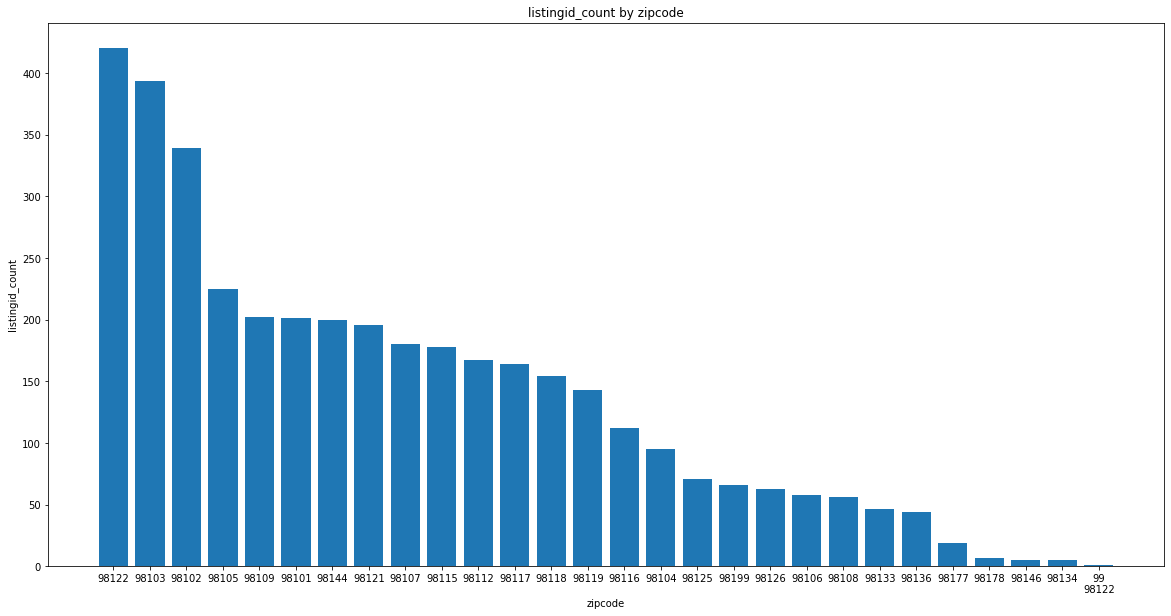

In [15]:
zip = listings['zipcode'].value_counts()
zip = zip.to_frame().reset_index()
zip = zip.rename({'index':'zipcode', 'zipcode':'listingid_count'}, axis=1)
zip['zipcode'].astype('str')


plt.figure(figsize = (20,10))
plt.bar(zip['zipcode'], zip['listingid_count'])
plt.xlabel('zipcode')
plt.xticks(zip['zipcode'])
plt.ylabel('listingid_count')
plt.title('listingid_count by zipcode')
plt.show()

In [16]:
print('Top 5 areas which have the highest number of Airbnb properties in Seattle are: ')
zip.head()

Top 5 areas which have the highest number of Airbnb properties in Seattle are: 


,zipcode,listingid_count
0,98122,420
1,98103,394
2,98102,339
3,98105,225
4,98109,202


Top 5 areas which have the highest number of Airbnb properties in Seattle are: 98122, 98103, 98102, 98105, 98109. They all in the center of Seattle and near Lake Washington where has the most convenient transportation.

## Question 3. Price Prediction

The correlation coefficient is a number that ranges from -1 to 1.
* A number near 0 indicates a lower association (exact 0 implying no correlation).
* Closer to 1, the stronger the favourable association.
* A negative correlation is stronger if the value is closer to -1.

In [17]:
q3.head()

,price,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,reviews_per_month,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,4,1.0,1.0,1.0,788.481832,2613.33619,61.710904,4.070000,0,1,0
1,150.0,4,1.0,1.0,1.0,1000.000000,3000.00000,40.000000,1.480000,0,0,1
2,975.0,11,4.5,5.0,7.0,788.481832,2613.33619,300.000000,1.150000,0,0,1
3,100.0,3,1.0,0.0,2.0,650.000000,2300.00000,61.710904,2.078919,0,0,0
4,450.0,6,2.0,3.0,3.0,788.481832,2613.33619,125.000000,0.890000,0,0,1


Correlation among numeric variables: 

price                           1.000000
accommodates                    0.652218
bathrooms                       0.516017
bedrooms                        0.627596
beds                            0.589306
weekly_price                    0.626361
monthly_price                   0.495664
cleaning_fee                    0.583274
reviews_per_month              -0.199620
instant_bookable_t             -0.031712
cancellation_policy_moderate   -0.102123
cancellation_policy_strict      0.226632
Name: price, dtype: float64 

Present the result in heatmap: 


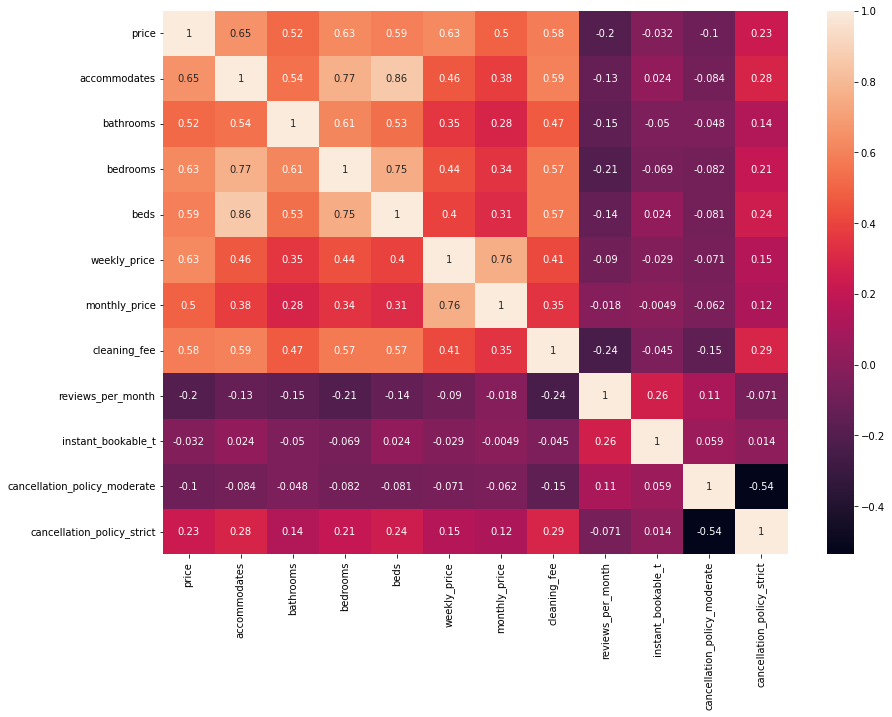

In [18]:
print('Correlation among numeric variables: \n')

plt.figure(figsize=(14,10))
corr = q3.corr()
print(corr['price'], '\n')

print('Present the result in heatmap: ')
sns.heatmap(corr, annot=True)
plt.show()

## Modelling

4 steps to build a model:
* Instantiate your linear model using normalized data
* Fit your model on the training data
* Predict using the test data
* Score the model on the test

The fit method in sklearn breaks due to NAN values. That's why we need to handle the NaN values in #Step 3: Data Cleaning.
To assure the model extends well to new data, we must create a train test split.
To assure the same train and test split will occur for different users, random_state is set with a fixed number.



In [19]:
y = q3['price']
X = q3.drop(columns = ['price'], inplace=False)
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  3818 non-null   int64  
 1   bathrooms                     3818 non-null   float64
 2   bedrooms                      3818 non-null   float64
 3   beds                          3818 non-null   float64
 4   weekly_price                  3818 non-null   float64
 5   monthly_price                 3818 non-null   float64
 6   cleaning_fee                  3818 non-null   float64
 7   reviews_per_month             3818 non-null   float64
 8   instant_bookable_t            3818 non-null   uint8  
 9   cancellation_policy_moderate  3818 non-null   uint8  
 10  cancellation_policy_strict    3818 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 249.9 KB


test_score:  0.6106924826212423
train_score:  0.6127076826643214
The model is not overfitted.
The r-squared score for the model is 0.6106924826212423 on 1146 values. 

Rank features by their impact on the price: 
                          feature       coef   abs_coef
1                      bathrooms  16.965889  16.965889
0                   accommodates  11.605794  11.605794
2                       bedrooms  10.722350  10.722350
7              reviews_per_month  -3.330174   3.330174
3                           beds  -2.768310   2.768310
9   cancellation_policy_moderate  -2.033063   2.033063
8             instant_bookable_t   2.009741   2.009741
10    cancellation_policy_strict   0.520683   0.520683
6                   cleaning_fee   0.393119   0.393119
4                   weekly_price   0.082866   0.082866
5                  monthly_price   0.001238   0.001238 



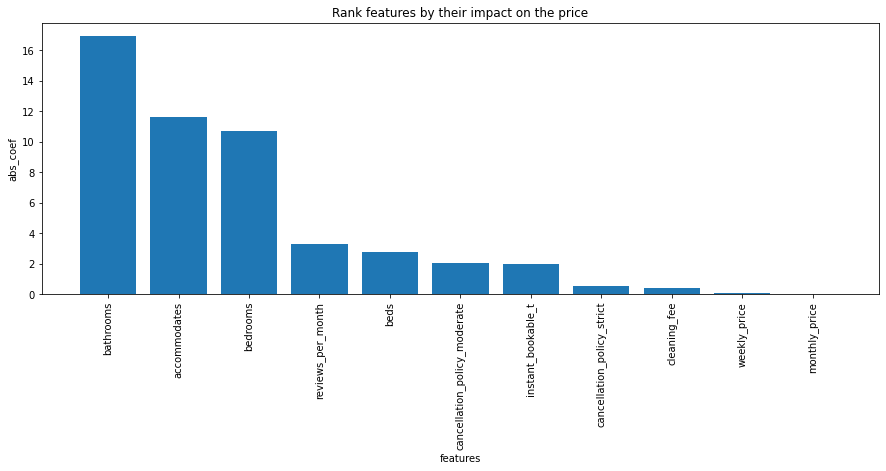

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)
y_test_predict = lm_model.predict(X_test)
y_train_predict = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('test_score: ',test_score)
print('train_score: ', train_score)
if abs(test_score/train_score) > 0.8:
    print('The model is not overfitted.')
else:
    print('Need to improve the model.')
print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)),'\n')


coef_df = pd.DataFrame()
coef_df['feature'] = X_train.columns
coef_df['coef'] = lm_model.coef_
coef_df['abs_coef'] = np.abs(lm_model.coef_)
coef_df = coef_df.sort_values(by=['abs_coef'], ascending=False)
print('Rank features by their impact on the price: \n', coef_df, '\n')

plt.figure(figsize = (15,5))
plt.bar(coef_df['feature'], coef_df['abs_coef'])
plt.xlabel('features')
plt.xticks(coef_df['feature'], rotation = 90)
plt.ylabel('abs_coef')
plt.title('Rank features by their impact on the price')
plt.show()

# Summary
The business goes well in the March, November and December in general. Top 5 areas which have the highest number of Airbnb properties in Seattle are: 98122, 98103, 98102, 98105, 98109. Among the chosen features, bathroom has the most impact on the price.